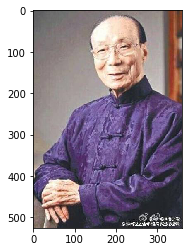

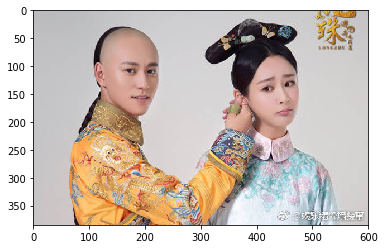

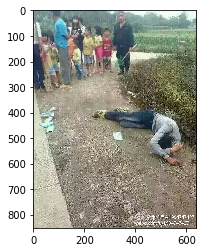

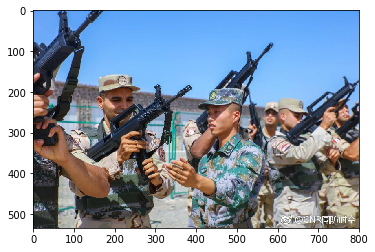

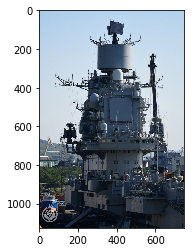

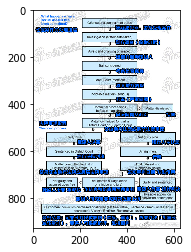

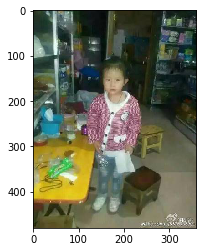

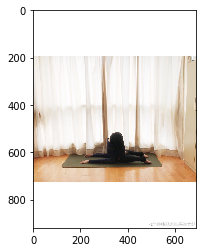

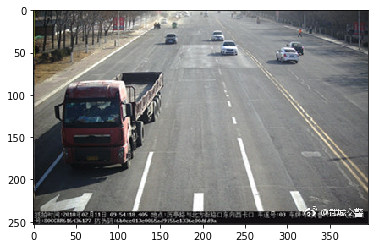

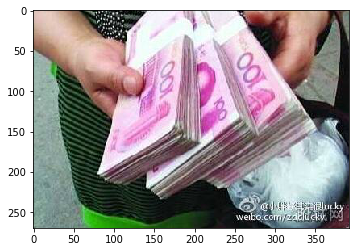

In [23]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

train_path='/media/Data/feiyan/data/pictures/train_pictures/'
img_files=os.listdir(train_path)
for i in range(10):
    im=plt.imread(train_path+img_files[i])
    plt.figure()
    plt.imshow(im)
    plt.pause(0.05)

## 数据清洗

In [1]:
import pandas as pd
text_path='course_project_data.csv'
df=pd.read_csv(open(text_path))
len(df)

33806

In [2]:
df.head()

,id,content,picture_lists,category,fake_label
0,4028762460708675,回复新浪网友对博文【国家文物局限制鉴宝节目现场估价转】的评论：;;查看原文：,NaN,文体娱乐,0
1,4126670854660291,//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明.....,63ad082a189566eed7c4bb3e4bc55012.jpg,社会生活,0
2,3702441948299962,西宁城管围殴民警扬言要把警察打死|西宁城管围...,4986dc2a5f09a87c7af5dfc57d7775cd.jpg,社会生活,0
3,4239549419245466,【川航航班因驾驶舱风挡破裂安全备降成都】今天上午6:26从重庆江北国际机场出发前往拉萨的四川...,dcfccfc69e90a0007afd6aafa1385e56.jpg,社会生活,0
4,3966337217183260,支持郑强！！！//【贵州大学校长回应空姐言论:常给她们写感谢信】,NaN,社会生活,0


In [3]:
df['category'].value_counts()

社会生活    20616
医药健康     6320
文体娱乐     2620
财经商业     1455
政治       1241
教育考试      901
军事        372
科技        281
Name: category, dtype: int64

In [4]:
train_df=df[(df['category'] != '政治') & (df['category'] != '军事')]
test_df = df[(df['category'] == '政治') | (df['category'] == '军事')]
print(len(train_df))
print(len(test_df))

32193
1613


In [5]:
train_img_df=train_df[train_df['picture_lists'].notnull()]
print(len(train_img_df))
test_img_df=test_df[test_df['picture_lists'].notnull()]
print(len(test_img_df))

train_pics=train_img_df['picture_lists']
train_pics_list = train_pics.tolist()
test_pics=test_img_df['picture_lists']
test_pics_list = test_pics.tolist()


train_labels=train_img_df['fake_label']
train_labels_list = train_labels.tolist()
test_labels=test_img_df['fake_label']
test_labels_list = test_labels.tolist()

19006
1061


In [6]:
def list_flat(pics_list):
    pics_new=[]
    pics_new_position=[]
    p=0
    for pics in pics_list:
        pics_split=pics.split('\t')
        for i in range(len(pics_split)):
            pics_new.append(pics_split[i])
            pics_new_position.append(p)
        p+=1
    return pics_new,pics_new_position

In [7]:
def get_imgs_with_labels(pictures_path,pics_list,labels_list,pics_new,pics_new_position):
    pictures=os.listdir(pictures_path)
    imgs = [[] for i in range(len(pics_list))]
    labels= [[] for i in range(len(pics_list))]
    for file in pictures:
        if file in pics_new:
            position=pics_new.index(file)
            index=pics_new_position[position]
            imgs[index].append(file)
            if len(imgs[index])==1:
                labels[index].append(labels_list[index])
    return imgs,labels

In [8]:
import os
train_pictures_path='/media/Data/feiyan/data/pictures/train_pictures/'
train_pics_new,train_pics_new_position = list_flat(train_pics_list)
train_imgs,train_labels=get_imgs_with_labels(train_pictures_path,train_pics_list,train_labels_list,train_pics_new,train_pics_new_position)

In [9]:
print(len(train_imgs))
print(len(train_labels))

19006
19006


In [10]:
test_pics_new,test_pics_new_position = list_flat(test_pics_list)
test_imgs,test_labels=get_imgs_with_labels(train_pictures_path,test_pics_list,test_labels_list,test_pics_new,test_pics_new_position)

In [11]:
print(len(test_imgs))
print(len(test_labels))

1061
1061


In [12]:
print(train_imgs[:20])

[['63ad082a189566eed7c4bb3e4bc55012.jpg'], ['4986dc2a5f09a87c7af5dfc57d7775cd.jpg'], ['dcfccfc69e90a0007afd6aafa1385e56.jpg'], ['c27128539623efd8b07135aa583921ed.jpg'], ['98f293c7e67688a8384be27cb74ab6e4.jpg'], ['4c67880f93a4424a3f5d50dddec54d12.jpg', '97e39a9a0559dba56144a4351c11c512.jpg', 'cd1b58b49a515039ea387ef34b282f4c.jpg', 'b1745194178ec6749eb828dba0b039d4.jpg', 'ff59503827f3d9f6c0b0723e5d39cb39.jpg'], ['2b1c16af2f29aa64796fad48389cfa1c.jpg'], ['244139d24309ff08550c5562f466d6bf.jpg'], ['4dcbb6806fbb27d6d9d5d79cd79b0c9b.jpg'], ['0973b409406fb548e038fdf81a638757.jpg'], ['847437169d65b4511d4a92065d0e516b.jpg', '46ebb0b1b679c914a0952358d36253fe.jpg', 'fae91aee033daabac5e8721a2a103cd0.jpg', '7db7d685bd71bf2014c3accf7fc46f1f.jpg', 'a3dc3b72703af629b6c47040328f2095.jpg', '89ecd36e1b0982e7ac60586a43608f4e.jpg'], ['f55a59db08f88f009ddd81eb741d654e.jpg'], ['12e12ed1cc3c4bee9425e7ad3a080929.jpg'], ['ad2eb8a4b3fa6264ccf2ea078cc6c6e4.jpg', '0e892566654f5c2dfb72b528bbedeeba.jpg'], ['65989dbc3

In [13]:
print(train_labels[:20])

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [14]:
print(train_imgs[74])

[]


In [15]:
train_imgs_new=[]
train_labels_new=[]
list1=[i for i in range(len(train_imgs)) if train_imgs[i] != []]
for i in range(len(list1)):
    train_imgs_new.append(train_imgs[list1[i]])
    train_labels_new.append(train_labels[list1[i]])

print(len(train_imgs_new))
print(len(train_labels_new))

17670
17670


In [16]:
test_imgs_new=[]
test_labels_new=[]
list1=[i for i in range(len(test_imgs)) if test_imgs[i] != []]
for i in range(len(list1)):
    test_imgs_new.append(test_imgs[list1[i]])
    test_labels_new.append(test_labels[list1[i]])

print(len(test_imgs_new))
print(len(test_labels_new))

967
967


In [18]:
print(train_imgs_new[74])

['d4a03bf1373048cf5563d777d401d216.jpg']


In [19]:
import numpy as np
np.save('train_names.npy',train_imgs_new)
np.save('train_labels.npy',train_labels_new)
np.save('test_names.npy',test_imgs_new)
np.save('test_labels.npy',test_labels_new)

np.save('train_names_ori.npy',train_imgs)
np.save('train_labels_ori.npy',train_labels)
np.save('test_names_ori.npy',test_imgs)
np.save('test_labels_ori.npy',test_labels)

## 重合度比较

In [20]:
train_img_path='/media/Data/feiyan/data/pictures/train_pictures/'
train_imgs=os.listdir(train_img_path)
c1=0
for file in train_imgs:
    if file not in train_pics_new:
        print(file)
        c1+=1
print('img not in text',c1)

29f0dd1d17899af40c3bfac47eb8de43.jpg
70d6225ee9df65c306b9f3fb7a1201da.jpg
fc2c282dea0b9a06d6b9a19b95b8f45f.jpg
46f24ff31b4ce5c2a0476340814af1c7.jpg
fccd2327e75a22f3376f26676fa61a8d.jpg
ba81d4d2c3e7cd369ffdfb67f15ef519.jpg
1e23ee499ca80afdd9fca990cb72b08f.jpg
3702fd74f7f0032c897a76a885f0a8b6.jpg
86d9c3a9e567626948b1e85ba3bb3205.jpg
eead9df9a2377dc246e3d868bffe400f.jpg
1f3246a840a35f665fde1153ab3859e7.jpg
8d71ce515eaa6faa75ee14ff4b9014fa.jpg
8d0c7a604ae19f9a84002f84a55f636f.jpg
01316d303705fc8f33c762e0c9cdced7.jpg
b01c96850c7862f7a9afc437ca57b468.jpg
56d303bcf0422b892db1a0cbe7c62031.jpg
1822513eca7dd2838fa53c22d342e009.jpg
b5db2bb79dab9df8f5f49f0c6384b48e.jpg
001ea679299bed9ac1e2284ce5b355ee.jpg
f3b2fa46267777726a54c6ff27992244.jpg
c7f0cc4038a69cf976e886bdfa9ce886.jpg
fea750d6a42eae7d52d8ed2cda7a0f14.jpg
1e2ca130c022da60369e652346eb4b3d.jpg
a0e827167b01ebc30539f93431673c5d.jpg
2aa0b48e221c597c304a4acdec72c57f.jpg
06cd175e7da4fa1d281afd968294899b.jpg
c951be7f3096a8b5899892954e31a037.jpg
d

c6cf1db2007c33823a037d928fe05fa4.jpg
6f8d3b799875c760d4ceb002a27093bc.jpg
6e79b27c4704763af7ba395af03bfe02.jpg
cc73742025c2ecebecccb404b5e5449d.jpg
c31d7944d8d4dc089df162a9cea4f0d3.jpg
1a892c11fe34e3fb9f13657323f47e2a.jpg
27b142d7763ab611d3b713ad4fc4e30a.jpg
a1ffe8679d01176c6eca278f782dd0d4.jpg
6434a180d55346de5b353806043fac55.jpg
8935df23c8e9a1c4d3a2428d4b95dacc.jpg
bfa9ba8641ff9b262ae1c66fc7330403.jpg
164f5dfc39fdc0b136c10dc3c65eeefe.jpg
05bb11bcf4b1f9df4c385f703841b6ff.jpg
b9b8a23786a7e54c78a5a790eed9b6f6.jpg
8077fb6757b08a3f9716ac31249d13f0.jpg
dee4b488f785d59c6fccf2188161713b.jpg
eebc9a220810bd717bb1bfdda9b7d68f.jpg
445c5f8df4fbbe78bac26c5964170c0e.gif
db7cd3889d0caf5059f7f934effb378e.jpg
9c4847c6fcdbf5b5bd45dce803981f87.jpg
8be76b4052e69df68dddf5ea124d10c4.gif
d3994cbebd9c394731d201952c6999de.jpg
d15d61a57a6cca50d68eaad375e753cd.jpg
4471001eb2eb9e2544701a67542f1783.jpg
6745136d06f3187011271f1bf8db60f2.jpg
4aa2af18adeb93d536f8eec394de43a7.jpg
6ee6f66a30a43ca279bda18f3f9c950a.jpg
7

12dfc710594ae4dc7570a90ec9cd7c9d.jpg
f1e2ce7b03132d1e863e56411ee8eb19.jpg
b3c35ed3ae1be397611e2a5b1bc4b295.jpg
3aeeb69869f05c122dbeec592ed57b6d.jpg
19f068b923efbfc5af19e7cb5608bbcb.jpg
639540f02f75ebba68b242537ca11a87.jpg
b9a844d9b7798541e7dc0cd0d6c133dc.jpg
e856ba775a2587dd0263f8d1353b6dff.jpg
4ca3a7caae2a7cc8e0c27c3cbe2f4eb9.jpg
c56e2e72a469edc6342fecd13bc6773b.jpg
e22ac65041894fff7dd3f7cf301c61ce.gif
f4d4441ce11a3a702d8fba825f6e8ce2.jpg
c23ab264cc1baae9e2e410053a544582.jpg
014360bfa9f0c2a8165edc150e1b86c7.jpg
73587f3cc5367295b485b28584b06bd8.jpg
842d019ee4835a046eb2d698a7e78415.jpg
239348fe57a7e6af889d37405dcc924e.jpg
9f9f23574bdaaeb951dd278f15b4b383.jpg
75af6d0b51f4d1bc1a2d80b4359b4f38.jpg
c0c4e3719f97c30684b4f593071745fa.jpg
03a52ee9c176610fcc06a2f76c38cfd3.jpg
04bf6c64c2cd414a9b2c97de4c022772.jpg
c90110b54a4c9ba7af68c89f5150212a.jpg
bc904aad7e194cfb0d5eeb37926e6495.jpg
d8d2a66cbbb773af26df92cf85c7b522.jpg
8a021b8fe444ffa3eca500a40f405100.jpg
efac58b860afe67b3c0fe09e2a41754f.jpg
e

dca5759b03a09404a3b461d39099b495.jpg
b24fdae88563e6750e72c4cf54af13f9.jpg
dbc2932be02848df490dbd9368cd076b.jpg
73cfed1aa8487307fc9753388a1b1324.jpg
9aa670bc6989fe79163eb942e2aa468e.jpg
37497391a4ea99a93c31bdbee5651654.jpg
25753a6e5bc6525bc5d5aeee001633b5.jpg
d475d66dab6e6d1c0a81245db95c19e2.jpg
32d648b587ea731a9aefa93c8700e3e9.jpg
5304b17cd687b503dac33a4035a1eab3.jpg
7cef42c04de34430b860af0d5644ac3c.jpg
b6b58322d4393e224b09f1bac26bd5c6.jpg
571bf336773a105f3c4a8926392bb01b.jpg
ccad26aab3ca6e8aa14eae020c239573.jpg
1c7c317ebc6d2cd122ece77137903c43.jpg
4db0187d29ac1380555ca8b3cbd18b2d.jpg
f078745337856aa749630c74dd724ad0.jpg
36d4618527384fd04298b80d370c644f.jpg
328be61835549e081f079b8094579527.jpg
8455ffdc4f33789f3d9d34b93f40131b.jpg
21cbbbf1a5507ffd31f36771038b0b09.jpg
56ed6f6cc94070a923d7fc916ecfee85.jpg
69f8458a371d505be9cc54b2be337cab.gif
2d06c3239cd0c6be3cfde108e245c3da.jpg
b73b5353696318e6143f35b15b5fd139.jpg
d09a89081745c5630a939541748e7ffc.jpg
25041ca613682d18bc0c8b660e4382db.jpg
3

0d3dee93ef1d900cfc8c912d37c175f7.jpg
7e54ab572d2e00a8a719f61a5489993c.jpg
d84d90f4959c181dc43a780a3e4619cd.jpg
4e29ac201b89fcd61140801442302923.jpg
a87cc0d73e519de2992657287022c808.jpg
7de2adb972c6a65d46e6458fee22bbc6.jpg
7dcf42cd07b525972369dc7404b37558.jpg
af943cfeb21ed1c1b418cdd3184f988a.jpg
4830c75064d8f1356fa5ea5aae914cc6.gif
e00a9477c781fac8268ee90807ab7d45.jpg
a939965a74702fcc5d00d1498f19dade.jpg
ee33412327e70a5b39d18012a7513ced.jpg
d066302bffbfba11f42ff27b554d71fe.jpg
9a11304693efeb096778d2c5a9431608.jpg
b0dbcc5954a47be3a56b4a61fa64bd17.jpg
56757b4b8c8115115bd065afa1534e11.jpg
80cffc3db08129e464b248b7f38a1792.jpg
9614aeaa127ec1eadb6c12d06176f46e.jpg
144c778daf536007ea2dc3cbc16c5936.jpg
d37e796203b9fbbe3bbd9e2993cdadbf.jpg
65fd5a8f29e988e1ecf0758612f3c5cf.jpg
fad769988263509f42dbbda10c75de50.jpg
482cdc54d5410f47a9510eb299a2f978.jpg
faf1ed74eed530074020d1a891d7c8e0.jpg
140c7f64392709799a8b4f6d6303ce06.jpg
3809e4c7e97efab63cf9b4d36f790c76.jpg
bcf4d4ae989d72665575fcc6004d7de6.jpg
6

f6c03cb0764f1c1d42d2b112b687f2c3.jpg
6af6a7a33b3c019baaf833f0f2c88a09.jpg
2ca5ebe5ad3304d946b9939b7da378be.jpg
482e58787d7e10d357414c058cd8cadd.jpg
2693ba8b5975a12ed33ee29277f1ad9a.jpg
2206adf12060e166530eac352b76d0d1.jpg
f91f7bcc95d738a0356dc41d33ef43c3.jpg
707283022b4b52d990df6aed7bfb3f4b.jpg
981bb1e6120cb146bc08b3bd0f58c866.jpg
0d9dcc31251354de6f22657b2fff7c41.jpg
7d10229a191a51268bdf8cb3e7cd1061.jpg
a58801b05ef1ca23b49df52caefb7843.jpg
dcd271ba90c90c67558c46132edcdd91.jpg
d1440c67d3cb3ea105b1f6516a2ddf8d.jpg
7aeeee8bfd38985a745fc285daf36ff5.jpg
608b6ed4ad9bb0e11945311f2e0b96b0.jpg
2ac87ef546ed5e2ed1c65d0681654281.jpg
32734b2b0388296889d733b03b5f83aa.jpg
51f42288c6debc34ca6133974bbb8283.jpg
2a21c1f6a090653043661c0562d22471.jpg
eb8bdbd87847e1dcd031b6291b66d2c5.jpg
3ff231e4a96eb50856cc25610f5ec7b0.jpg
d95337e0e4d6801d9886ea7ae0395207.jpg
075d82ad1e1bf4c81c9e1a4c8bdd8076.jpg
a2a181acab3b7993639dd4fb2c308394.jpg
a8e4daae4b3a14a7cd4757c89c75d42c.jpg
066ee5664fb82c0fe760921da866ecfb.jpg
c

4f0ca03ce5da6447db67f10c9ae6c598.jpg
085fc13e426da344e6cb6dd2856a8ce3.jpg
06326014d9f6d3c144169563cbfa6148.jpg
ffcfa03d8479afc19416958472bbb33b.jpg
5e2b6c0c471b81f15e0dc0647c3a127d.jpg
acd9d2adb8ebdc9a1a27e8f094fd2a15.jpg
6a924e820693ad337265d60dc71d8026.jpg
d171f499df335fe7b783241816d43c68.jpg
6fa6067153da4a1049d1f9a93af2ce51.jpg
77fbed36dae01fdd425006870600a079.jpg
f8f4ada0e689d4b8b291433e1e8c3520.jpg
be541108e2db1b409c04443c6de4d667.jpg
0d447d4bca74ac5a138e584601e9361d.jpg
e3844ef55169bca243aa56db91dd2e29.jpg
04d17730fc32e10d0ad168950fcc8e7e.jpg
1deb9e5f5385acfcade400246ba87dec.jpg
372e15164f9ad58140ce629d27382d5e.jpg
e84ac76201e760fefd3718532fbbb23e.jpg
9616045b43cf82ae465f039546edce04.jpg
26d46bb0540dc1dc0519f4e31bc2af73.jpg
d340909bcbb7a3efc587d4cf59cd1388.jpg
16127d3c02fcee3710329cdde9e72e75.jpg
4dd15c2f97dec8c603f7ed59d05e098c.jpg
ebe93772145f2bd634f103b2aef627ba.jpg
eb3dbed95f820402fb14d4b127bad3da.jpg
933c8ce48652a5459312affd3cf0b335.jpg
a6daaa4c872cddee6e59c93ca3533d8c.jpg
5

e93005454b93cfdf6acb945b069785c5.jpg
bc9ba5471dedcc090bd815c5b840bccc.jpg
a1099fd430bff194cc7a5be25f806224.jpg
c7f6eb32ab44c04f135ed3739404917b.jpg
3b48967a4bb31f4ccde3c3ba2a506228.jpg
3068068a4034e08c4c8a7448c128971b.jpg
481ea480fb308ddfbe7b9c5f94e42f3d.jpg
b67807000250643e1a85852a501d2ad0.jpg
cf4287fb6ef2d68d723c060a874eec13.jpg
e5ed9fbf9d801c150b556455c6177695.jpg
d22b0cdde1469b3694e42976e38765ad.jpg
015eedc365c442c5a85cb7e36e377ae3.jpg
c5cf325ea9ea6a126d4e87e5eb1786a4.jpg
0c6689e03476008f504cf287b46c36b5.jpg
332bb7ac8cc80d0901e01dfd9a4b16c9.jpg
db2d2c1763b4c123dc2710d093c62958.jpg
51c57b90f97ed6cd230624e6cb4b792b.jpg
e6dc4a53e8f2b26668f91a351bbed07f.jpg
2441ce476a90c8158bf772de47bb72fe.jpg
341069bbd0807a250f2cd29271246f71.jpg
0bea284885391359815de887af71fbaf.jpg
0171adee749c929825f6def4235941de.jpg
bd739c129954007cd576521c5354de73.jpg
89c4bdce70b2eeaf3d68f60fde887738.jpg
0874c1f8c38fd7fc6c9036cdb0e71e07.jpg
0b2dcf2c83708a84298b10ca47c9d1a0.jpg
7c1245c2029b72a21d4ac9406f46d4a3.jpg
8

f45cff5b8a5fb77245ec3f7a84e14f34.jpg
5185450bd6d77c1d8944f58f0e371b38.jpg
e8257a77ccd5cc221c37543ad9a47965.jpg
d47983fa2aa994e1091598926597211f.jpg
39e70d15e6f542abccaab43ef5383afc.jpg
684fa9751e06f230da52a682f4eda162.jpg
d55c9beed95c6fdbfd73bab0cb188da4.jpg
2676f76163f76be4db4e35f6bcf858b6.jpg
50faaf7d1ed2c2205422727cd67545a3.jpg
4c2507a16c5ac7c8a57bbc67158c4611.jpg
2df21ad387cd139475a20c82315738c6.jpg
70fcdac98d49e042495c762b484a663e.jpg
07791130cbd73ae783f7a84a67b2baca.jpg
9170df2fa9a348b57d1cdde023f611b4.jpg
453ca5941563fad9999b8ee1e39e2fbb.jpg
c100e512fbf9656e539d38a0edadda6b.jpg
6141110283d9e367997a92ddbe8dd9c7.jpg
917330ff293da922c124f367c49fa8ea.jpg
401efbc200ec316955caf22864e031e1.jpg
6f3919d91b1a92b7ea738b1e5f936303.jpg
34f1699383b8fad83c5af01cab73be38.jpg
8f718644e5d969c43d7f23eec2e5931a.jpg
5398dcbd4d142f989498b71698bb41f1.jpg
1639e63eee00f81d231bdf4d03141487.jpg
9f90cb9c04db7fe870141cdd40779de5.jpg
43317a322d08d5b7db685108681f516b.jpg
47b21a83739706dec7dc0c6aa6bb0580.jpg
7

68bc5e5c519c95c72a531de06e11934e.jpg
761b628e12e32f860c0962bddc91e204.jpg
73888eb6b66f88dbb2816ed0d2c2cffe.jpg
5ab1657b5ea16beced0f7b96f78482a3.jpg
fab9f583c26902acbdafcad4c8134947.jpg
c4e591ea16686ade9a71c3ee7365cc7e.jpg
14640478e4a7bb3a5ec385c6dccd3075.jpg
f76a11b14b2dd184a2f78ed5ae3cc42e.jpg
6499ed3f008f55319e6da0d302b9ce06.jpg
5a7d9a061d38f71531fb90372bf720f0.jpg
c4a830d1d092baf16947f7b38ac3948c.jpg
decb6c96e469921fdc584b0761980f88.jpg
b04e2de3b4ac618338e14dc22e09ef66.jpg
fee00cecddb574bca2f3b62cd4ee606b.jpg
d22537965180adde631015c0146fd458.jpg
c2e2f0c785ef88a6cab284dd8911a733.jpg
5e70f0973cc098e6524c6af12b0c0385.jpg
1ca806220e278d87aec05a1fa50d3547.jpg
b44f9fc7d01b2e8e6ffe4449dff5c18c.jpg
c270fb92316abcf238d87d1fa8aab029.jpg
fba20bec0607aca354b483950be9150d.jpg
97c96bc6d5a2ebd23b9029ba759aa198.jpg
85f29e54a125b8eec196f227f6bec0fc.jpg
cd5a5e4780ea36e252cda38b02a04ffb.jpg
9b0a44d6aa0be0837e747072f1033387.jpg
06db59169ad14173f80c4401b61a0f5c.jpg
93e79ffd1bc47025499d160cdf9b2df7.jpg
3

7141f2d1c74778deacc2c55043d1f18f.jpg
b216d4eedb7dfbf5f1d4050b726835d8.jpg
5996e20dcf425c442d1bf0914725ec2c.jpg
20c47b82404c8bc6f0bc3c44b5601a89.jpg
2d60d52e66bbeee0393168ecb9a9d66b.jpg
e22f4ebfddb4047bb400326f4b214497.jpg
a860fdb30b5e39c195d3c07f624f2e6f.jpg
f4ce8cf1882b25f3bfb3153df1dc6871.jpg
1f107f0ef9a537e8ae819fce86043b8f.jpg
1f14b90ad910c7a39f98dbea32b6a026.jpg
86aede09d7a7582ac1fbc28be9391018.jpg
b00146dfd554bbe469762af42e04718a.jpg
5f829739036297553c35273c22e773d9.jpg
9c9e6509629ee20c71f3445d3e8573ae.jpg
685d0ec9801dd097580405039d585c8b.jpg
8dc0b18f4a4b243570affb1147f555ca.jpg
79b7a56521aa23fa7da9d3533e224b8b.jpg
72bc97f491681499483ad39201877386.jpg
90c23eb874be51ec2141cb5170cc8e0a.jpg
c80db5ac6ed7b82bfcb933faa75d9ce3.jpg
531fb36508c815eca43b2020a7c0dc33.jpg
25a5cd1e664752ffa5f9dbce1386fe0e.jpg
0b45e550fdb1be3f3a5426d055c79e3d.jpg
4a83827d3daf4b61f4cf732ff9e47302.jpg
4ae15f8d54ce2d1b328e45a43beb5847.jpg
b6c1b6eb3821c0c885c3c496ec8a712b.jpg
3ca1e3c230293b4da0e00c3811ee05d7.jpg
0

373a3eacf79fc14dc24205dd2ee01ab6.jpg
1b8fe2d676d94b7dd16710cf1e56f100.gif
f209fbcc1a1e4340c701a35461360590.jpg
655d4fafe1c52a32e6186504f56f332d.jpg
7b2e049b879f596cda48d7cc0ab42774.jpg
218ed68501f4c4178f2f59d55c1ef559.jpg
11065836119ff39f33d09e22d8371e90.jpg
661dcb4bc5616b1849462476e8304ffa.jpg
207b6d70d1c05ad7a3d5e18ee2cb5835.jpg
c8389a5027d5cd33d6521695d26390a8.jpg
a54ea2a6b7d2cd4b331822ab87f92b8a.jpg
6cbd5f85c2acd29e09572c09cb8e080b.gif
483167f47ef993b8fe665193e0f4588d.jpg
4861c4b7d4a55b6ec4a1b79646290116.jpg
c383bbc322b77643b51180b8f9227fd5.jpg
0e1e856b3aa6b029a01190dc6d59310a.jpg
a7a6c8b5e7faec67c8d703c6743a68ca.jpg
2dac0ea5b2ce28d986925037a9f8c017.jpg
66bd327888ab72d5ff85dd4a4c1c711f.jpg
4de8a525c46ebca38cef844d958147bd.jpg
f8685b1751f4c3782c62fef1a2fac20e.jpg
df57539cfd82762c147e58995a2567ea.jpg
86af7c6503e2321f857b5f5e89879dee.jpg
51e48885a0792d524f3f1c28d038c136.jpg
ba26e75664ff74378c837964743f9dba.jpg
ba8690ce2b19df6ffcb3fb69fd62b65c.jpg
59056208c4431807ddcbd710b6a20c1e.gif
9

d5d68dd1af65313ba0622fe1fcfd6f04.jpg
25105edd105ce2d03f9b51ebc52c386b.jpg
6bc380eb02b31466110bb4103b9e4147.jpg
1f56e6294facd9dab44e4dda300c1608.jpg
e0b16aa6f00517b367dcf955508ab770.jpg
c933f34553102d33d8b3294622f93f64.jpg
5cd1e2033e4bb10782d2cf9628f3cf00.jpg
631ca9846c0253b23f2fe76433e9c458.jpg
71ccd1452fc9980e9c2fa6752f5e9300.jpg
302ace8ec3f0d056869d223b2ea09105.jpg
ecbf7da892d511cd2e5b6c186b99e9d6.jpg
e043b551a252544631dc980708efdfe7.jpg
bbe0543352132c76947a902f1f5617ca.gif
e8dab247e99b0532793b1d4129a7e957.jpg
1b16131f2ff8ba0cbef76aff3d44815c.jpg
d003cf61f549204c90204cb591c8d38a.gif
e4db7cb7531b2b78982cd77fdad3e79a.jpg
e86ecfcf7f3bd4c750090eb2db553587.jpg
d7525d5e9ff33c0c6bd6f9d36ea79f76.jpg
362a85f7de8cedc32f3c33b4a6f6c662.jpg
e4a63c4fd4ca856092de203d2cd05cad.jpg
9d5dfd43b5243961ec931cd867417ea6.jpg
102d7bda95fdc09499674866e91873fd.jpg
d6cc7451d042d87720960b976f0f766e.jpg
2654c75fd0771c8868d19dc5c8d8bd0e.jpg
19c27ea4ed7a2b29fba668f3e81758a8.jpg
f34396965eb94276ec9fba6922bf93cd.jpg
f

c687ecb23674911b9de23bf76adc9d4a.jpg
b39f73a277faf8c371b00cc34a68833e.jpg
e6ffe644ce4858ae27a17641e6ea61d7.jpg
026d653548d12e66923a919ae9cc4103.jpg
fe916f26502f060b6c777fd9158a9f8e.jpg
538046f375ad0dc8ab1f569e8361315d.jpg
146b1e951ade52ceaa6c6af4e641cfad.jpg
be8fa1a53ffbd254fff4ef56f422da71.jpg
cda76d9f800f97d720d401fb489df4a8.jpg
5019f69ea8970b3cfd22151d86f7b56d.jpg
ba82c6f018e597df051f971ae4a1657f.jpg
397cccdcfa716cd30a0a955d88211551.jpg
f9444a3c77c8f7e2f10c6d5dad9d8cf2.jpg
f7c14771c5a2698b4b9d28602901be26.jpg
eabc9beaf36bd72becb7369439be9caf.jpg
1454ce7b480b5529dcbad050c3977965.jpg
0fb7dcadc86244ebc1517ecb33bf1519.jpg
e3ef7b4080cce53cf2bc6767af7bcf42.jpg
7a0de8caa83955f87161bd9f48d70921.jpg
a517dad281700ede4f713ec4913223b7.jpg
f65bc00a985e161bcdaacc76b7a033f0.jpg
97a18d9ceac080107760d5b85a548b0a.jpg
ba72affa944c3dc8e6a98b1d65ab3679.jpg
71628f44d3f33d980aa56c91bf6440d8.jpg
20e7a28e1f7c65dbb8499e13ede9c351.gif
fb760ceb34a4c1b9a823fc49d78c0c45.jpg
62f092ecfab55f8367fe8e007bb86181.jpg
2

908fe9ff4ba1e9e0bc634d520c988e90.jpg
94315f880e8b105410d0ffd2e96ca20c.jpg
aa8b91a40d659cd8f95974ecd3201475.jpg
c9b341fcfebcb7616bf29bfc1e17de6a.jpg
fc38ced05d47553a760a61d024a433a4.jpg
6e0d96302369c2607892b9dc8f10e4d2.jpg
5cfd028e552cedfe08744bca6f91fad6.jpg
b5009bc87facb78d1857be09c6787954.jpg
6453cce445b54e2367e1686b76b2ef3a.jpg
3176bbe79e1b88987d116ddaded1bc3d.jpg
a8a00524c0a988ffb2d6564ecdf7f9db.jpg
166d68229f72696a266f5496e951d0dd.jpg
ee9083ab3e751b1fc4f1450ba1963e46.jpg
29d456d65f44729a89a4214ecd501d05.jpg
add84247c12d70dabb532df7b69ade83.jpg
5045ac9defc789514589c5e0cc31d148.jpg
4629661838d7d2401bdd58ffc54b4ed4.jpg
7bb63b58dfad164766f8fee41f852dd2.jpg
b6cde9b8a5931b62626ff5c2512602a1.jpg
002863d8481aeeabffcba0a4910463dc.jpg
52640ea7f4910f7b87d0ed9bf174d8bb.jpg
49ecea553e0219d545c8e824098cd9cb.jpg
a182fed0ac656de7e4c1df6766f7b23f.jpg
ee6a38722ad18cf6ab0521599d7dc267.jpg
fed6c79d0d75b1da43083a38999fe14d.jpg
9a5dd2e43f3424dada411b9ea09c7285.jpg
1f1feb3d99312886db7e40372f883d6e.jpg
8

0d2c3f09a43b76a26d5b0df4d2a1ccad.jpg
b97d7a1b2a9602ef31d553e93e7ff1c7.jpg
a894e1050f7339378bd2c4fdcc316dce.jpg
b807f11fdae4b36ed5b4d2abc219961b.jpg
6e6599943cb88887475db0f512612167.jpg
0a2eb2880b73b9b9872da653e53796c2.jpg
0b6f3f4008a80d227fc86883e19c3cd0.jpg
0af18980ffc13140164b1b5d50f2f9fb.jpg
b5bc41519c6d197fa23291e1ed020704.jpg
5d81aad6bfc8542c57c7a44fb872cc49.jpg
46bb825fbc6149fe6ab970f9c205ac67.jpg
15e0dfe2974aa8c9c080e69db54b0d23.jpg
c7c8d4264ad07ca0146fee47e742c5bc.jpg
ad52c58b9f49609328026c583d0407e9.jpg
afb33694d5032a8cc08d52fd5dcd1650.jpg
054f19fb5f1044bb2672a74478615043.jpg
0a06faa6e4885f7672d808927c07d21e.jpg
94252d8735af3d7378c83e5172e0d95b.jpg
5249558f40feb5954e8088b9adfa5a32.jpg
a5866d29b56137eccf4eef410b4c3b79.jpg
2ab8a74c6c98412afb65bc458128966e.jpg
9bb0becb951f5bc24e9f58b5b8c2c123.jpg
f83671eb0fbd27553f79b62e616c59d2.jpg
74a90349470cfc67294fcc1ffc3b8d55.jpg
2098036b72048734bdd7482e2bac4224.jpg
3b40376626e34ae9cbd9d57733f5143c.jpg
777421cffe9ec3e4c1cd072f329521c3.jpg
e

bab1a12fd3172238962f8b073450daa4.jpg
d5ef3fef7eee882b5faa07fb2050949d.jpg
7baa5682f08ac2fa4c0253326fbb3984.jpg
a566caa18ef45846c652e6fc129facab.jpg
721f31f5cfe037941b616afb6ac49bb9.jpg
d7187286985c600ac8c37e1bd4270c9d.jpg
93355a15cda88868d3804f465e6e0fcb.jpg
5c2aea2cd06fd3590822e851c1eb952e.jpg
d379ab1e7f7814b66c4b17f9a572ab33.jpg
e80bc47e4db2c9177ac9b393b1a0bca3.jpg
b58de216b0067fc8facf6076cd78b1c3.jpg
0753352cfd2e8c30b56ae1791633496f.jpg
9cbd0c74f77d614298e223d8d382105d.jpg
4487c3fd5250f8a6eb1777a1458db93d.jpg
f0e49c9927c0457e04ee6834f5c9c64a.jpg
15e4df676d0cf3c746b902546d64bc27.jpg
afd290b5c35fbf3767127c2923848d0e.jpg
4ab4de32a67f933e4d3884e820c2df0a.jpg
00adf9e19d03fa6d6ca89a220da09117.jpg
45b3204cde1f848b75f8aeb0eb0b9605.jpg
51b8e43cae91dec0213bc6cb8ae1523b.jpg
7d07ebfcbb05ae21ef46bbab41a4b2a1.jpg
618c444daecedfbd3d64e22b49930eee.jpg
a3816faac47d3ce27d0d4d94284dc8a6.jpg
0481fc358b122799f820e3ae497f3cf5.jpg
7c07249c546c31766f6155bd0a74c745.jpg
43199ca417dabdcb6c5dc50956f62bdd.jpg
a

0de431b55821b7556c4bdb3e4412a7dc.jpg
e1229b9f74a037143dd08e7620c30408.jpg
19464b462ffef9449586619d999cd551.jpg
354648d79643cbc036b01b9105c97728.jpg
8bd5391f529fd7af27b1704ab820cf3f.jpg
7a2d5aff2e4a9752cf801b48c1f7a4c9.jpg
ce3a4302df563f1568f3b410e74d7eac.jpg
2eb378014c1eb21e45f31b139b3b5a87.jpg
26931ee3407de8c97452e14362793ecc.jpg
824b1f1a1aae3305bd70c6c794f5aea4.jpg
7b2a8f9acebbf77eebd9254bf197f085.jpg
133f5a6da7f6fb53ee8e7bb2ea331cb2.jpg
0b286c61842b1418f4ae008a49448171.jpg
073aa1ee5bbf01ea686d7e34cae67623.gif
3d9871d2ea143d98f0a9fe3804a464df.jpg
89b7b162c2de9bbca6dfef494d901ccb.jpg
f0272aa95f0cc566b33ca377c8d25ee8.jpg
cb192c4adb56d52c1b85958049624dad.jpg
d87e97dd2239f50d2d07356428b05325.jpg
54619b681c041b4ab51be1787e50d7b7.jpg
5edd6050c6a6a5816a3ee3af1d497b66.jpg
5f4e72ed3922a487da061e421e3bc4d1.gif
7fc87960e41ca09bfe85419e9bf52731.jpg
a6f3d55e11cee347f8b30cbff85cc213.jpg
50ec91b211d8bfbeaa3dce552a96893c.jpg
e864fc1f550da7ec81556cfba7b58fe9.jpg
8a8fc66101e851e89d20b431e2d14160.jpg
c

cb1ec144e1fd4e10ac6fea4fe1fd0a37.jpg
c9264937537b4540120dac6dd14a7b74.jpg
4c1b1246ae564ff3e9f8cbf144d6ac6e.jpg
829953b1e13292baae9fd8f1b767c7cb.jpg
06aac681c5944aaf635a0bb0c329e67c.jpg
4ab8183b3ee17254adbb01005c77b7ee.jpg
168412413fc31f5046f9547808bd58f7.jpg
5b40cb21ba9d779b84b89b692d09eb57.jpg
faec1e622ce7b7ed870f73ea72b3d686.jpg
8c44219beae1b7955e11163b994f6589.jpg
114439b1e71ac5da7a14cde80150dd95.jpg
62d3f49a9ec1f1e6699c231c22a853e7.jpg
6a5ba4eb215e152e31dadac11beb9764.jpg
137fa4aaaf67323db0b5fa4b43bc433f.jpg
7ff3c8e9bd3ef61355de6b03f83f5e1f.jpg
9a0f6a0c23a11161b61cf6be06c8f32f.jpg
26ae9c2a11adb6157cc8787478a7d6e8.jpg
75048d701c2fa0a45bcef9848dbebd9d.jpg
25ead7f9b915c9d19b303be53b73f490.jpg
c6d6fe3407575b2ef30f658a0215a4db.jpg
fb391713ec66696ac61f20e3d805a532.jpg
557979ddc63492ab6fada69eab89364c.jpg
b2fc7b188d9a4d3d5156b97355b4e0f0.jpg
83864beda66e59fd3cbae986c6756a30.jpg
efc8480b72fc373e6af77306b6053ac7.jpg
5ef6252cd58362089e7e62d442c5a7c6.jpg
0a7305d49cdc84c2b2fec748dda1741e.jpg
d

839b555ccb4a184a5498aed204728381.jpg
d55127599c0c87fcc5b0dee0b855a58c.jpg
ffc99f467bc902ce220121e787596363.gif
b43e90fb82d8ff1deab724380b49418e.jpg
532a0382cf7c457ca89e7800a8459477.jpg
53ce55eeda6805f66d16bb14c44439d7.jpg
5b19ba2d71f85b65e18d98e141df4af9.jpg
5e17a405d684824680fdefef02ed0030.jpg
70ffa6555a4063b7745078c389b0a645.jpg
0850b004d11997c6680365ec7ac07499.jpg
8c300a315892cf1b8168ef0eb074fd75.jpg
6a624b93ac4edc6a0ab34fb2df6a54b1.jpg
6a4a23838451fb473a234c32a08c12e0.jpg
dad6305fad36bc43b6261456ddf28fd2.jpg
a6b361d54c3e5fab61f26df2ceccf1e7.jpg
31d5ea2390a9f76618d87eb17d571978.jpg
eac1ea718817f7964cdb3d82446d8cb5.jpg
18b58b11daedaaaa04842fb4f7247762.jpg
00a15c96a1d457cab0f66197c4b46e68.jpg
95c243643409c55345cb07965f9ad1fa.jpg
15734ec94f31990825955f27dfe27aa3.jpg
d3a60dc353a3768d76c2f1d85a3d9b6b.jpg
d83bdb674ef518f25de2ac10faa3ee94.jpg
04a8aea2077ccfb249380ba98b251339.jpg
c9284083a2fe83869cc170998e855b49.jpg
4c845ba41e24c9e65a7691fb2c2122ac.jpg
e3d1f6cb48d5351fb17fcbe6d6c7c81c.jpg
1

665af4119d5cf044231715c4cb3f1297.jpg
1a8c53ffe66bcd02b248c120abae18ff.jpg
4ed88a5248ab353b1a153b6d30eb8a3a.jpg
193962912bd9bb7ced5cc218f0ebaa27.gif
8a78ba312c3c66dceee54d43647d0f20.jpg
aa146654c3cd392c0f82a95af1077f27.jpg
a6741378eb05881fd9a2e65747c0a89e.jpg
8417e9dd7619937f31c58b4d6f7ddb63.jpg
ad1db40fa02ce2810a8c096854b5a97c.jpg
560c150a52bc5c864bfea9ef77c0f937.jpg
7d7f67e600299128549bca8592236d91.jpg
8b36157ff97aa93c7e76971d3788b5a8.jpg
a3e20abc3ad31e6ec45580dbe0fec664.jpg
7a18027cac39a691180d53a1ef6f91d8.jpg
d25b53156eab5526765e547c908e9d19.jpg
1d6c216d73b1955b4f75fd8c16a3cca4.jpg
eedbcaaa110b00a6372934bbaf9f3282.jpg
2b657ca4d6aab62f01384bb17ff8e230.jpg
0b0b634788a2639793ee7159ece52fdf.jpg
d98c1173822a40a0a25821af2f4f0bf8.jpg
f6eb92f8dfe8b7e1f1c7b03acaa798bd.jpg
dd752d406c96d67b6568d243ef0c3f82.jpg
2a42114162f86a055b281e73e3cc4e72.jpg
310be50b74e78e48d066ddfabaffae3e.jpg
553eec202be7f152cf904e0ba09e797d.jpg
2ea47c43774c9fd59e451c0ed278ef81.jpg
80507a8aae8ff0f68c3772a517a5e147.jpg
6

4a02c32313d2288ede982de1d38507e1.jpg
1c124caa0373f7ae87b4d4e9a7a82ce1.gif
ec68b1c7d38b40f89571fe34f1a51b89.jpg
024eaafc927496e4efb0f1a391876fd7.gif
2fa67c08b1e13b83eba32c8fd6ed2f1c.jpg
2e14d5604d57c8f93e496c1dd9c0aee3.jpg
90bf63f9a87eff83e59f9c78725be5ac.jpg
2ce21e909084a89655de329d26c7b860.jpg
8cbe164120f6c964f1c3fd834a74a7da.jpg
01c05d050353697bc5b1b18cf93259bb.jpg
50597c0cc783124c80448c6b0e007664.jpg
483008b1114df99db05fb8b0177e15b7.jpg
f3c68f6f96b12b97d0242828f3a503eb.jpg
74bc0f4e4db0839277952014c73bb8fa.jpg
f0825444869bf6910468552ee976c26f.jpg
4ac82e65db6fd087dd2b44f45dc3526c.jpg
56a970f46772c1ef848a875ef7b07f12.jpg
d815b9f3ff56e3fbb0c68d27662de586.jpg
1d0905138967a0f8d6b7429b28f26a60.jpg
1216775b2b35e276d466c15928ebf96a.jpg
904a0ecf3828190286ad8573d0c37c2a.jpg
14ef8b00663be5e29540a7cb8afd10ee.jpg
da62b86fa05ec6b96765797fc9171c92.jpg
82dccba0d8ecd955317cfe758ff5d31e.gif
38aea9c86dda488e47fd9c04edac8110.jpg
84dce9667f040ffdfc8592cc01bcab32.jpg
26274d4eecf4bfdfc6612b2c4161880f.jpg
1

c0be2d43b6181fec70a67831add36ca0.jpg
9363baf566776d848019db45c7786a01.jpg
d530311b0eecee6ac932fb5d551ec120.jpg
e6dedab4bad9af30262e1a4aaab10e1c.jpg
0061559b57e9cba17039002c6e359873.jpg
0da281be39306d818724554553a59dd5.jpg
af98ca91c9a3e94769f1a3a9e41cc3b6.jpg
f74114c2d47f97ce73eb757b01aec37e.jpg
3977c96c7d844766319378551974a6e4.jpg
9ff824342b548a95364ba4a7cd9c0d3e.jpg
3a1486a445c90b255996323c8eaee581.jpg
e199d45e0376ae1c66518ac36420deaa.jpg
af2aaba6ac7930fff4b1f121223cc635.jpg
c820c412807845678b4be679b5d96956.jpg
cdbfa0d3ff77fed70299090ebcef8604.jpg
b9162a74b26292cdabf18bab950526bc.jpg
6359269bdcb7c930cf694990666c2158.jpg
77998d1fe39be88dca49a354619737b1.jpg
f64e0cc71eb5218a700f6c820ab2e727.jpg
2711206157fb4f950d3afc0546772cc6.jpg
a42096f290b9df0ea47381c1437a50e3.jpg
870f7e64837afe2d55fd6e623e77cc04.jpg
16251d6f742ccb78913d349efd52eb1c.jpg
697b5aaa735f0c3aa182eddd742f156a.jpg
de936edb9a7a2c4548306f1a98125334.jpg
76fe5419f9e1394fe04cf4c541b98360.jpg
7eb8661ac8d15fc2c2f13945ecf5f859.jpg
b

d4056eca3edb68555eb47000e70b05b2.jpg
415d733ad64e58f6c1e5de5eb7343355.jpg
e7ef5b0f05e691c81897f63be6ce1247.jpg
17cee5476d3694413ac357ad86302c0e.jpg
367e3b6ed54e065a1d6a845e84ca7dd7.jpg
ea74aab29ae916085b8bcb2672464dc7.jpg
e0510152324206ec330b94435ef036e6.jpg
a0052619a2482e2b20fe60636e8f1c27.jpg
ec78c5fa14beae09deb908d75f8a3f57.jpg
af227d0a3fc691406d5b92e93a797f10.jpg
b0a44bcdda5cc0157ce12c1c709edb7c.jpg
48f714170058023f9d0b3195dc51b0a5.jpg
75880b0170ea5b79cea3e196bfc80256.jpg
05747e7daa2b209ee073858e7feb2094.jpg
c6de40e1f1caa9dad152054b96218ce8.jpg
da05a25b399f0326048d09f4e4062545.jpg
4b02df71e2163503268e15707b4e2756.jpg
e73daf7509f651c7f1f6b6e47789dc27.jpg
a2a3f5ce46cbf16d945889196cad2414.jpg
04c9e42391eb84a975aab8bff346fd11.jpg
2a070c8cbffc5a32a0d096cd62d27c76.jpg
e9994a62fcf6c86e75a126c8de689f96.jpg
3c91c417506af9a8d1d51b281ea04716.jpg
0ff44cbcca4f17094ccdf3bd58ca07dd.jpg
2ff6377a102bdd74d288a0681d611632.jpg
9e47c887cd3e5c42eaf956d6eaff6b7d.jpg
2183e1fa709d41b9ab626bf5c453a9fd.jpg
0

294d63d2ffe5c2e14cdb18a3d86bd670.jpg
e2deafa4cb531aae0475653c77ec93e0.jpg
49b255b822f06f12df864dc16cc9dde0.jpg
ac65a6a0988c54fbf520cfa160489843.jpg
0d1dcd78caa323afe2ba20e7e261945b.jpg
dca8cca663aa922fffeef8585a333ada.jpg
c57002fe7202a43c5d7aa37383c16c90.jpg
2d48940a70b122407c2aa398058b8737.jpg
a546a31e80512626a085cc17a58ac0f4.jpg
b813c18a53e3d080891f0b748b6f643b.jpg
861a3f45c26779f1a46bbb5a5cc65427.jpg
875b28c9819c80469de1003084151c96.jpg
a0a5839466bae3020a2dfd45762768c9.jpg
5c323f51a03b86a9eb926b3bb7043a6d.jpg
f73e041517ea0e4d1fff4ba827a272bb.jpg
3b945858981b6f54ee12f17efa84576d.jpg
c377a072962d8e70d36a8b0690504f6b.jpg
f2652cdb28260b2593608eb756a0f1f5.jpg
455f7e0936d890898dec6ef855e55323.jpg
2f2a6d6039807c17d3a022c425e4bc69.jpg
48535717a813c9e13f864896bfe51f2c.jpg
64271d4381a2bb1c39583ea5a208e122.jpg
f760e056bd3247427848782b609c3838.jpg
823a2be20a35312a92bcdc02ac24191c.jpg
0e69dc78b34c6bbf463a5570032bdc83.jpg
e94b62007771511b16f9554b2c43ea9f.jpg
e78ca530177982b0e405e1fe4c3745b4.jpg
b

b75df67a69992155c50d0f0f7cbe91d8.jpg
5ce51db42816582e2f76d5546c371a9a.jpg
8b212661e69221f083a591614b780e1f.jpg
09502bb398fa05026def7da61a0814f5.jpg
744f9d39307460f2c5958ef8df87bdd9.jpg
a076f0a3a3c1dfb0cdfffb339b2180d3.jpg
4d2d1e45213c56b4530f5dcd8c8cf86c.jpg
6861703c2456a6940efc341b155f7d0e.jpg
5bb8b4b344deec92eb171278afe14610.jpg
5df0175f49e774b7e47d206cd4a68281.jpg
d7b3e94cdbfedb2c3aca5f2adeb6a6aa.jpg
a33a6b7b6cab1fc3bfb9501201378beb
7436c8f4fedd0c80b44c22057cb85989.jpg
18f101bd145eaac0ed77355931a64087.jpg
a716450815c20ae919048f1d03550ed7.jpg
748eb7f29c4b6c7909d931a80be0d970.jpg
e92430d728993107860fce39aaee156b.jpg
ff0968e9da8da1919da6b12e53c0e4a8.jpg
e73478bd55bcbaae9bcfa9a4a5afbd65.jpg
ac7b03ffcadacdcfed4951b90d099d1d.jpg
521af5cd5c0756a479b83c18caa25584.jpg
e6790fdcaa262fcedec5fe97e858d5d5.jpg
b760b3b6911fc362b04a14abef57fcd8.jpg
7f5bd9ca766dfd6f5664de1ef1e76084.jpg
cb3ed813c155d789a2920c116bd028f6.jpg
5cd68267f1ff408b399f48f042233c8c.jpg
a0cf8fc56340e0418bbb957dea490577.jpg
5eb69

9ba72b5df6d6e1abe6eab4a7209f4aff.jpg
aa49a614cef42984397c1d77eed89a08.gif
af9bb5a1f8d7dc308bd0a7f35839c480.jpg
b05e3352d6b380a732ab9ea069a03e04.jpg
bbe2b4df3570c15f8dec84bb9f37b5d5.jpg
e420e8afe63f7158e30086d898a6a678.jpg
6eb74d01a91e8a4030e80430757d01d9.jpg
7f343b684b36e2823b01f048fa08f651.jpg
51b87952c7c16ca71aa55893d12ce0e3.jpg
c9104f59a8f0ed244209cb722cf13401.jpg
b45f77caf0f76fa1add07b146da6bdbe.jpg
ea6a9ee4cf0df02614a9d5f887b455ba.jpg
714304bf0de7cc32734049df4675dc43.jpg
2ec0e4c016a33b161fcc3ec1c7dc1adf.jpg
8a00bdcbd61cfb3b37a597e8901bf4de.jpg
5ec0adcfa30f949aff90fd5a3c189a5b.jpg
aeca6cc669de7273b13f6e5e8c7d3f55.jpg
b2a0e04c3c643155390987a718c6154a.jpg
b0918f1eb8642bb38e997a30c143eb4e.jpg
4f0daa352fc38db9e0d2b1468921a89a.jpg
ff14d975528b7722301f3d943ac59c4f.jpg
e065de9694ee57eb7483edb7e4715170.jpg
7406520b42be9685b7d653469c03e948.jpg
73fbf0a074000e2477f2d42969814b66.jpg
6a4d65439f82c9683408764e748f0dc9.jpg
4747436f184afff27b0a5b9a11ef0948.jpg
bde32c94a444e6433bc78f6e3ea3f61b.jpg
4

cf0083a847a50e9360d62d4ec953cc89.jpg
76fec816efc45ca6415908c725cf1d1f.jpg
126fb9ba4b08ef82db0e757091f531e3.jpg
20efb9b2e67714e2659dc984ee9043ae.jpg
1e22d40090ac1b240e44278cc7ce0014.jpg
0f4de8161066df4688ca213d7fe2e285.jpg
b87fc6370962ec1841f14e06931d4f63.jpg
e438c5d8b5c8ea5b4cd59137eaa1af9f.jpg
f8a8a4306fab6ebb6bb4289b2560a8b6.jpg
de80d69c4ec90ea292385dbd6d3beea2.jpg
a3b699216bdb2b9922b7a69e061c3ace.jpg
13ef77d763a2328e4f78abac712c36f1.jpg
26499e2a863571603d42dfa1c20dd610.jpg
70027cb643a32beda38dcf793436e5cb.jpg
3cacd398a0167cb3ed3a4b51378a5a0d.jpg
02b4461c1bc5d83a0b524611abd66f4a.jpg
ffce116c98415264ea916791aed357f1.jpg
a21538ac27c91f4ca81a8f496841ecbb.jpg
2b8c444e4d4f402b743575d0ee1d8898.jpg
d3b6b4297cf0cfe6b86e1dcb5cad23fd.jpg
babd03f00dbeecd9822a6e572093ddc9.jpg
22a0b0fda5c76bd41d90e076c4ee2690.jpg
3cf3d3c3312eb3c2e792a623821fe4e9.jpg
8e2f21c4bfd62734561f95bae256edbc.jpg
b21a909f1fa1a5a48af166503b03e772.jpg
b66b06f4a7fe987682cb64c5fe92339a.gif
5acb4d3c1e340bbc20983b6da9d704a8.jpg
2

f876d0473d51f991721012cff7e5644d.jpg
0038aa064430915dc8ed249f4e3cbb93.jpg
60df79c9299a77f2c8835d2dfdd90e69.jpg
c9327d4fd7f8e691ce004451ddce9723.jpg
1ad3c9b8f26c9722c9943ce9a596bfc1.jpg
17797338be5fdf2f743ff32d462ed70f.jpg
6136aa979f8a86b0c584892759d91a24.jpg
1162a31f7c2740c355a0478f710f9a10.jpg
09595b52c8868425b7fe9114a475f915.jpg
f59985f6cc17faf590220d262b9da5e0.jpg
1e1f38c6003a16fd50a831023ef0e8d3.jpg
01ccf58309acb7ac75fddac2881d3abe.jpg
4269c696c142ace7e87b348bd5600edc.jpg
5391ea82dc09454fd44361ca7412aad5.jpg
b2bd90abca9355bccababe32321a68f9.jpg
dc61e52a84f4dfc8bd6fe0db84c28e09.jpg
17900ff6bf484dc7220d06455518cb60.jpg
420772c5fcfffe1e0b1f143df7f25a8f.jpg
136be34b422312e5913a85cede16e216.jpg
584c09470ab392643df7f7b987a2422f.jpg
c6df524abbb36510a8362b88477c3f77.jpg
46b8138a43c95ceba8af7707d4f446c9.jpg
9fdd319bf5cc0f6af7181a5a623bbc85.jpg
c3b852b21cde82bbbae1b213e401bf53.jpg
cc0960b9280347c823259e5496aa70e9.jpg
dac88961c2251be7225528c43fc074f4.jpg
4c90d3f3d63178fa6b3766b983f64714.jpg
e

8226ca52d05d768b8c0d1fc2c33c252f.jpg
0464a7f1b8346707d4e12020908de418.jpg
8da097ef6e2e91bf76ea3238c70f6bb0.jpg
9b6f79083d0087a3e90cf9c15b43898f.jpg
8e3fd476eb5a4316c4b6f49db8f125c4.jpg
1fedb2ea0aabc2d0118271aaedab18b4.jpg
bdcc91db1dc9dfe6fae51a255078f965.jpg
36a16b1ddc1add0490d1aa12466388cf.jpg
dd3f36a5352009de46ced65b3c4592ed.jpg
620f487e5a3dc0fe26748b4906284dde.gif
b0b2ee755a0216bac28319c50765a8c3.jpg
edfd8a21c43931489611344c137b9a71.jpg
1669bba9b8f85f2c9ee91f8000207381.jpg
b659f48055fe71049605883acbab3cc9.jpg
b255eeed346cb160a327909a21c0c9c2.jpg
c523e7dfef83b0dfab0b802393e5cc82.jpg
2c8d8217aac809c1f21ba5ec37095d4d.gif
15f6b6090fe23fc9a80d49b17b632475.jpg
83a6147ccd82a1cdfc0032f1a0748fbd.jpg
1817f33b44f68dd801ce6fe764d13ccb.jpg
769bf52c97010347c90dd0a5835a2609.gif
39f9b1fee062994008906734d6b0e6bf.jpg
eaa01878013eb2dbb508781d39ecee0e.jpg
fff8d455044dc686e311d569a33faf75.gif
bcdd781401a7bdc306ad1a20d80b8ac8.jpg
cbf4c104c8276ba6efdfdf3f25169b2e.jpg
236e574d0da782c40c767acfc618b14b.jpg
2

2fffa9be33145be4f7df4c045673adda.jpg
ce734cb8bdc1cd76fefaf0bb7c69c728.jpg
2bc39aedd3962e4ca32ce14432878e58.jpg
c9d328c72cbffab539ec7abf2052dc0f.jpg
317360e7c9e6d724f57cf79f922169d9.jpg
f138ae310320f23d32b29986884ebda7.jpg
04cd06263a3097f17e0c6c87116f0c4d.jpg
358b634957a96dd5c88bf8cf07f7642c.jpg
924cfdbf7c717ec81080127b2f067037.jpg
f9c4af2407adc8d19491fb806851df5b.jpg
99701f982d43f2a089937e1ee02df1b1.jpg
142b480882a59b104bc68d3ec3b7c366.jpg
3b836ec81ba77fc346c6afbadd0afd7a.jpg
5e56d12654f7cf5d74e6f154d8f1b440.jpg
18bd28b0961914a2bd1baec0547cdb43.jpg
b48de380c62e3f63fe78de10c11e01c2.jpg
528c1dcd461316a1f381373a8f1ec3ff.jpg
36411494889cb737e8b883221a3b78c3.jpg
1014395041c62b004d780db3d4a21d4e.jpg
171ae7378a09aae63fa121c16826ee11.jpg
9b752e0ecc6b1adc8a3317f3cb301369.jpg
2c2d4af7db70b71d3b5371fe42da3218.jpg
95a2f6617dd71ec646913c80332c65d8.jpg
c75052f732113555576babba48e7c517.jpg
62b078ba88a1a939a66d978f1eb661d3.jpg
6811a2cf37a083b9de560e25e786a824.jpg
ff03b87d52a94fe8a0b1644eecbb409a.jpg
2

In [21]:
c2=0
for file in train_pics_new:
    if file not in train_imgs:
        print(file)
        c2+=1
print('text not in img',c2)

96acb7a83da068b22297e4f972d1bcb1.
e90088dc9a4b15fbab834ad49338f288.
8e8909d42bd36c629291b3943eebae7a.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
29ad0ab7967c3426f806e7cfaeedc803.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
28d7eef2921631a91ce76d57182dde64.
96acb7a83da068b22297e4f972d1bcb1.
d986f7ac85d1257735d74a4ff033f1b8.
8908e2a96b96bab0dd4f7b4546130383.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
e90088dc9a4b15fbab834ad49338f288.
96acb7a83da068b22297e4f972d1bcb1.
d20c9e59bc8d161896cf510cd048fe7b.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068b22297e4f972d1bcb1.
96acb7a83da068

4fbc383b28722a41827f9f20fefc883e.
b76f9ae026813de11a71ab6ee97d1948.png
94fcb35b7a3badbc41ed7ef1f4fb8e60.
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
84c6e83c6ac71fa2535f1a9c9b045bf3.png
8185f0a0055947e3f84b8450af0a532f.jpg
59058e24516124df54df9c2d80d01e01.png
933b9f5b8a8be817c44a50fdd5645b3b.
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
7b39e3abe946bcb4515197a7242c323e.
96acb7a83da068b22297e4f972d1bcb1.
c44dd5aa19d8a8cc37971f441b5cd4f1.
84c6e83c6ac71fa2535f1a9c9b045bf3.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
e31791f7acf4d8016e3b8d982a57b31d.jpg
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a7

96acb7a83da068b22297e4f972d1bcb1.
51edf14463b8c3169b9be3db7d7ca5a2.jpg
8783c51258d0e6b8a6da174b81087b8d.jpg
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
84c6e83c6ac71fa2535f1a9c9b045bf3.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
15cda1cc4932d1a960f7c4acaa2d1108.
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
37db59ac88b3dc5af1d3131c75b9310a.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
b76f9ae026813de11a71ab6ee97d1948.png
84c6e83c6ac71fa2535f1a9c9b045bf3.png
b76f9ae026813de11a71ab6ee97d1948.png
68ffa949c420a69b42d688ed4a017a9d.
text not in img 574


In [22]:
print('训练集图像总数:',len(train_imgs))
print('文本图像总数:',len(train_pics_new))
print('训练集图像不在文本图像中:',c1)
print('文本图像不在训练集图像中:',c2)

print('训练集图像在文本图像中:',len(train_imgs)-c1 )

训练集图像总数: 61432
文本图像总数: 33399
训练集图像不在文本图像中: 29410
文本图像不在训练集图像中: 574
训练集图像在文本图像中: 32022


## 训练测试数据集转移到文件夹

In [1]:
import numpy as np
import os

train_rumor='train_rumor'
train_nonrumor='train_nonrumor'
test_rumor='test_rumor'
test_nonrumor='test_nonrumor'

os.mkdir(train_rumor)
os.mkdir(train_nonrumor)
os.mkdir(test_rumor)
os.mkdir(test_nonrumor)



In [27]:
train_names=np.load('train_names.npy')
train_labels=np.load('train_labels.npy')

In [32]:
for i in range(len(train_names)):
    names=train_names[i]
    if train_labels[i] == [1]:
        shutil.copyfile(path+names[0],train_rumor+'/'+names[0])
    if train_labels[i] == [0]:
        shutil.copyfile(path+names[0],train_nonrumor+'/'+names[0])

In [2]:
test_names=np.load('test_names.npy')
test_labels=np.load('test_labels.npy')

In [6]:
print(test_names)

[list(['1eac69927d35ba0d813bbbca0441a5ff.jpg'])
 list(['80ece39d300efda5c902b4e3e5c639fe.jpg'])
 list(['8b0beda783dd66f709a02940ec68ac59.jpg', '2fdacd13a616c0759078be9e1b73e34d.jpg', '6e76fdcb5a60bcef6f25d9330356a34e.jpg', 'af13dd4291e4e75b3e3e49cee2e5ed9e.jpg', 'a4c78cfabc706a1f0eff536f3c303ce5.jpg', 'bbdfd60034451f5d3d7b51e585a0fd71.jpg'])
 list(['cdfefa27b8afe2bac2c01c9680e1aa3c.jpg', '24d3e22af4f30085de9864247b0572db.jpg', '5cc7cdffa2a70ed2a205c812784b343c.jpg', '1e22d40090ac1b240e44278cc7ce0014.jpg', '34ae39e31ab16bc5c3c1db73d972a2ec.jpg', '5005eba61828bb5a2b7b30bec0fa656f.jpg'])
 list(['5a7d9a061d38f71531fb90372bf720f0.jpg'])
 list(['5edd55a3d8ecd3d26543bdf04e9f0387.jpg'])
 list(['9b3200ea377cb544c86813f4cfb31862.jpg'])
 list(['bab78a5c12de1c33277655d42d0382c3.jpg', '6b32fc871e41904559332b7d5dbe5e3b.jpg', 'b488972dceba5fc2c145e0082273f1cf.jpg', 'd5ba91db5c12cde0f335208827918262.jpg', 'f5f4bebcc626a6e231b93a2213864cd6.jpg', 'c7610a147e9e32be551a9c70771db1ca.jpg', '595179d09dde8fd1

In [5]:
import shutil
path='/media/Data/feiyan/data/pictures/train_pictures/'
for i in range(len(test_names)):
    names=test_names[i]
    if test_labels[i] == [1]:
        shutil.copyfile(path+names[0],test_rumor+'/'+names[0])
    if test_labels[i] == [0]:
        shutil.copyfile(path+names[0],test_nonrumor+'/'+names[0])